This notebook makes use of the csv file generated from the scripts for sections 631 and 632 which can be found in GitHub.

The input file should contain the data from both MT systems being compared, in the expected format.

A logistic regression model is calculated to predict the impact of frequency of an equivalence in a system's training data on said system's ability to accurately provide a glossary-compliant equivalent to the terms in the glossary (referred below for short as "Translation accuracy").

A confusion matrix, and F1, precision and recall scores are also calculated to estimate the robustness of the prediction model.

Additionally, results are calculated for a Translation accuracy of 50% and 85% for each model to estimate a threshold where frequency stops being relevant for accuracy.

In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Load combined data
data_file = "combined-systems-withoutl.csv"  # Combined data for both systems
data = pd.read_csv(data_file, delimiter="\t")

In [ ]:
data

,Term,Frequency,Translation accuracy,System
0,agradable plush,23,0,MarianA
1,amargor medio medium bitterness,17,0,MarianA
2,amplio mouth-filling,2,0,MarianA
3,AOVE EVOO,648,1,MarianA
4,aceite de oliva olive oil,28807,1,MarianA
...,...,...,...,...
126,rojo guinda red cherry,2,0,Weights
127,rojo picota cherry red,74,0,Weights
128,tanino tannin,1000,1,Weights
129,taninos tannins,7519,1,Weights


In [ ]:
# Separate data by system
system1_data = data[data['System'] == 'MarianA']
system2_data = data[data['System'] == 'Weights']
system1_data

,Term,Frequency,Translation accuracy,System
0,agradable plush,23,0,MarianA
1,amargor medio medium bitterness,17,0,MarianA
2,amplio mouth-filling,2,0,MarianA
3,AOVE EVOO,648,1,MarianA
4,aceite de oliva olive oil,28807,1,MarianA
...,...,...,...,...
67,rojo picota cherry red,52,0,MarianA
68,sabor a almendra almond flavor,10,0,MarianA
69,tanino tannin,454,1,MarianA
70,taninos tannins,3306,1,MarianA


Optimization terminated successfully.
         Current function value: 0.431976
         Iterations 10

MarianA Regression summary:

                            Logit Regression Results                            
Dep. Variable:     Translation accuracy   No. Observations:                   72
Model:                            Logit   Df Residuals:                       70
Method:                             MLE   Df Model:                            1
Date:                  Mon, 24 Mar 2025   Pseudo R-squ.:                  0.3592
Time:                          17:50:09   Log-Likelihood:                -31.102
converged:                         True   LL-Null:                       -48.537
Covariance Type:              nonrobust   LLR p-value:                 3.526e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6232      0.392     -4.144      0.000      -

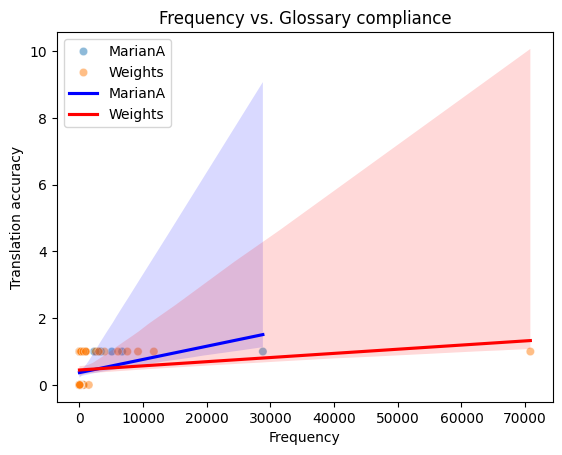

In [ ]:

# Function to fit and summarize regression model
def fit_regression(data, system_name):
    X = data['Frequency']
    y = data['Translation accuracy']  # 1 for compliant, 0 for non-compliant
    X = sm.add_constant(X)  # Add intercept
    model = sm.Logit(y, X).fit()
    print(f"\n{system_name} Regression summary:\n")
    print(model.summary())
    return model

# Fit models
model1 = fit_regression(system1_data, 'MarianA')
model2 = fit_regression(system2_data, 'Weights')

# Plot regression results
sns.scatterplot(data=data, x='Frequency', y='Translation accuracy', hue='System', alpha=0.5)
sns.regplot(data=system1_data, x='Frequency', y='Translation accuracy', scatter=False, label='MarianA', line_kws={'color': 'blue'})
sns.regplot(data=system2_data, x='Frequency', y='Translation accuracy', scatter=False, label='Weights', line_kws={'color': 'red'})
plt.title('Frequency vs. Glossary compliance')
plt.legend()
plt.savefig("regression_combined_analysis.png")
print("Regression plot saved as 'regression_combined_analysis.png'")


In [ ]:
# prompt: predict the values and generate accuracy and f1 score  given the model 1

from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Predict values for System 1
system1_predictions = model1.predict(sm.add_constant(system1_data['Frequency']))
system1_predicted_classes = (system1_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate System 1
system1_accuracy = accuracy_score(system1_data['Translation accuracy'], system1_predicted_classes)
system1_f1 = f1_score(system1_data['Translation accuracy'], system1_predicted_classes)

print(f"\nSystem 1 Accuracy: {system1_accuracy}")
print(f"System 1 F1 Score: {system1_f1}")




System 1 Accuracy: 0.8333333333333334
System 1 F1 Score: 0.75


In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Predict values for System 2
system2_predictions = model2.predict(sm.add_constant(system2_data['Frequency']))
system2_predicted_classes = (system2_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate System 2
system2_accuracy = accuracy_score(system2_data['Translation accuracy'], system2_predicted_classes)
system2_f1 = f1_score(system2_data['Translation accuracy'], system2_predicted_classes)

print(f"\nSystem 2 Accuracy: {system2_accuracy}")
print(f"System 2 F1 Score: {system2_f1}")




System 2 Accuracy: 0.711864406779661
System 2 F1 Score: 0.6222222222222222


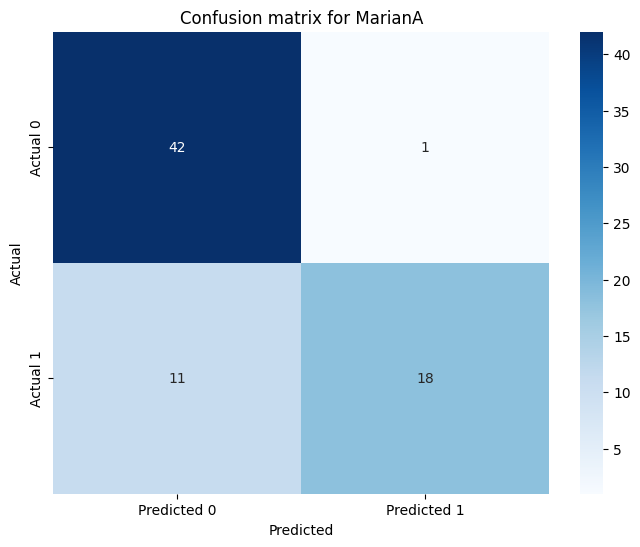

In [ ]:
# prompt: create the confusion matrix of model1

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming system1_data['Translation Accuracy'] and system1_predicted_classes are defined as in your previous code

cm = confusion_matrix(system1_data['Translation accuracy'], system1_predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion matrix for MarianA')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

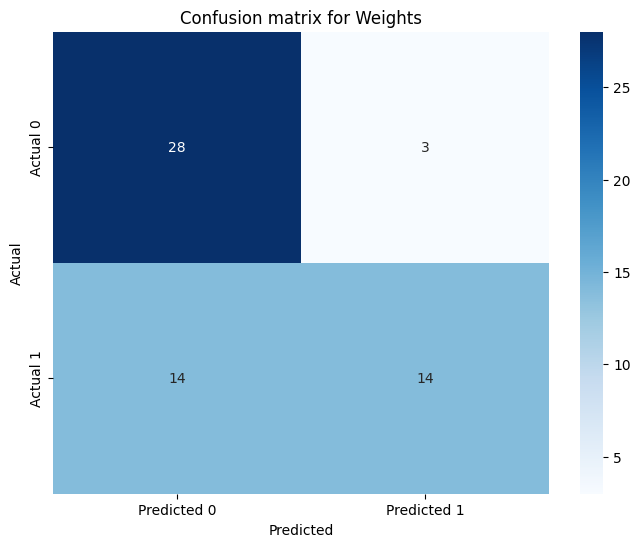

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming system2_data['Translation Accuracy'] and system2_predicted_classes are defined as in your previous code

cm = confusion_matrix(system2_data['Translation accuracy'], system2_predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion matrix for Weights')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# prompt: quiero conocer la precision y recall del modelo del sistema 1

from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall for System 1
system1_precision = precision_score(system1_data['Translation accuracy'], system1_predicted_classes)
system1_recall = recall_score(system1_data['Translation accuracy'], system1_predicted_classes)

print(f"\nSystem 1 Precision: {system1_precision}")
print(f"System 1 Recall: {system1_recall}")


System 1 Precision: 0.9473684210526315
System 1 Recall: 0.6206896551724138


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision and recall for System 2
system2_precision = precision_score(system2_data['Translation accuracy'], system2_predicted_classes)
system2_recall = recall_score(system2_data['Translation accuracy'], system2_predicted_classes)

print(f"\nSystem 2 Precision: {system2_precision}")
print(f"System 2 Recall: {system2_recall}")


System 2 Precision: 0.8235294117647058
System 2 Recall: 0.5
